# 삼성주식 시각화하기

## 기사 데이터 정리 및 통계
- csv 파일 불려오기
- 전체기사 일자별 카운트
- 결측지 제거 하여 삼성만 들어 있는 기사 추출
- 삼성 주가데이터 합체 및 주말에 없는 날짜 제거
- 수치를 백분위로 변경 (날짜별합/전체합) * 100


In [1]:
#import 하기
import pandas as pd

In [2]:
#주식 데이터
stocksData = pd.read_csv('/content/drive/MyDrive/기초 실무프로젝트/실습소스/data/samsung_stocks_2308.csv')

In [157]:
#뉴스 데이터(header가 없어 추가)
newsData = pd.read_csv('/content/drive/MyDrive/기초 실무프로젝트/실습소스/news.csv', header = None, names= ['날짜','제목','분야','반응갯수','내용'])

In [158]:
#문자열을 날짜타입으로 변경
newsData['날짜'] = pd.to_datetime(newsData['날짜'], format='%Y%m%d')

In [5]:
#전체기사 일자별로 카운트하여 데이터프레임으로 만들기
news_total_count = pd.DataFrame(newsData.groupby(['날짜']).count()['내용'])
news_total_count

,내용
날짜,
2023-08-01,2313
2023-08-02,2395
2023-08-03,2617
2023-08-04,1965
2023-08-05,896
2023-08-06,1389
2023-08-07,2088
2023-08-08,2514
2023-08-09,2540


In [6]:
#본문 결측지 제거 전
newsData.count()

날짜      60625
제목      60572
분야      60294
반응갯수    60625
내용      60437
dtype: int64

In [159]:
#본문 결측지 제거: 총 개수 : 60159
newsData = newsData.dropna(axis=0)

In [172]:
# 불용어 처리
stop_words = ['연합뉴스', 'yna', 'co', 'kr', 'DB', 'DB 금지', 'co.kr', '섹션', '분류', '서울', '(=)', '재판매', '기자', '구독',
              '제공','올해', '3일']

# '내용' 열의 각 행에 대해 키워드 제거
for keyword in stop_words:
    newsData['내용'] = newsData['내용'].str.replace(keyword, '')
newsData['내용']

<ipython-input-172-1c7cc577334d>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  newsData['내용'] = newsData['내용'].str.replace(keyword, '')


0        WP 기고 통해 '中 경제위기설' 반박…일시 조정기 정책도구 충분 美 對中 기술수출...
1        () 31일 오후  잠실야구장에서 열린 프로야구 두산과 LG의 경기. 연장 10회말...
2        (뉴욕) 윤영숙 연합인포맥스 특파원  뉴욕증시는 연방준비제도(연준·Fed)가 선호하...
3        () 31일 오후  잠실야구장에서 열린 프로야구 두산과 LG의 경기. 연장 10회말...
4        () 31일 오후  잠실야구장에서 열린 프로야구 두산과 LG의 경기. 연장 10회말...
                               ...                        
60619    2050년 탄소중립 목표에 부합…어차피 화석연료가 4분의 1이상보수당 총선 앞두고 ...
60620    IRA 1년 성과 홍보하며 서남부 공략…IRA 시행 1년 기념행사도 예정휴가 중인 ...
60621    건강 악화 공화 상원 원내대표에 안타까운 일…새 리더십 불가피도널드 트럼프 전 미국...
60622    １９０７年：日本が大韓帝国軍を強制解散１９１１年：朝鮮銀行（韓国銀行の前身）発足１９４３年：...
60624    (Copyright)    All information carried by the ...
Name: 내용, Length: 60159, dtype: object

In [170]:
#기사 본문 중에 '삼성'이 들어간 기사만 추출
samsungNews = newsData[newsData['내용'].str.contains('삼성')]

In [10]:
#삼성뉴스만 날짜별로 개수 뽑음
samsung_cnt = pd.DataFrame(samsungNews.groupby(['날짜']).count()['내용'])

In [11]:
#문자열을 날짜타입으로 변경
stocksData['날짜'] = pd.to_datetime(stocksData['날짜'], format='%Y-%m-%d')
#삼성뉴스 데이터와 삼성 주식 데이터 합치기
samsungStocks = pd.DataFrame(stocksData[['날짜','종가','거래량']])

In [12]:
#날짜별로 정렬
samsungStocks = samsungStocks.sort_values(by='날짜')

In [63]:
#주가와 뉴스 데이터 합치기
mergeData = pd.merge(samsungStocks, samsung_cnt, on='날짜')

In [64]:
#본문시가별 백분위
mergeData['본문백분위']= (mergeData['내용'] / mergeData['내용'].sum()) * 100
#삼성전자 주가백분위
mergeData['삼성전자 주가백분위'] = (mergeData['종가'] / mergeData['종가'].sum()) * 100

In [72]:
#인덱스 날짜로 변경
#mergeData = mergeData.set_index('날짜')
mergeData

,날짜,종가,거래량,내용,본문백분위,삼성전자 주가백분위
0,2023-08-02,69900,13835020,32,2.557954,4.929478
1,2023-08-03,68800,20087090,41,3.277378,4.851904
2,2023-08-04,68300,12360193,29,2.318145,4.816643
3,2023-08-07,68500,10968505,46,3.677058,4.830748
4,2023-08-08,67600,14664709,131,10.471623,4.767278
5,2023-08-09,68900,17259673,72,5.755396,4.858956
6,2023-08-10,68000,10227311,37,2.957634,4.795487
7,2023-08-11,67500,9781038,36,2.877698,4.760226
8,2023-08-14,67300,9352343,43,3.437250,4.746121
9,2023-08-16,67000,13174578,146,11.670663,4.724965


## 관심도, 카테고리 데이터 통계


In [66]:
#삼성전자 날짜별 반응갯수
reactivity = pd.DataFrame(samsungNews.groupby(['날짜']).count()['반응갯수'])
reactivity

,반응갯수
날짜,
2023-08-01,69
2023-08-02,32
2023-08-03,41
2023-08-04,29
2023-08-05,49
2023-08-06,47
2023-08-07,46
2023-08-08,131
2023-08-09,72


In [67]:
#카테고리별 갯수
category = pd.DataFrame(samsungNews['분야'].value_counts())
category

,분야
경제,649
스포츠,460
사회,243
IT,86
생활,57
세계,38
정치,25
오피니언,7
연예,3


## 정리한 데이터 시각화
 - 기사 버즈량 및 주가 비교
 - 일자별 기사 관심도
 - 카테고리별 기사량
 - 워드클라우드

#### 1. 기사 버즈량 및 주가 비교

In [82]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

In [19]:
!apt-get -qq install fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 120903 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [26]:
#한글 글자 셋팅

mpl.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path).get_name()
#plt.rc('font', family=font_name)

In [21]:
#설치된 폰트 파일 확인
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicC

In [22]:
fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', name='NanumGothicBold')
fm.fontManager.ttflist.insert(0, fe)

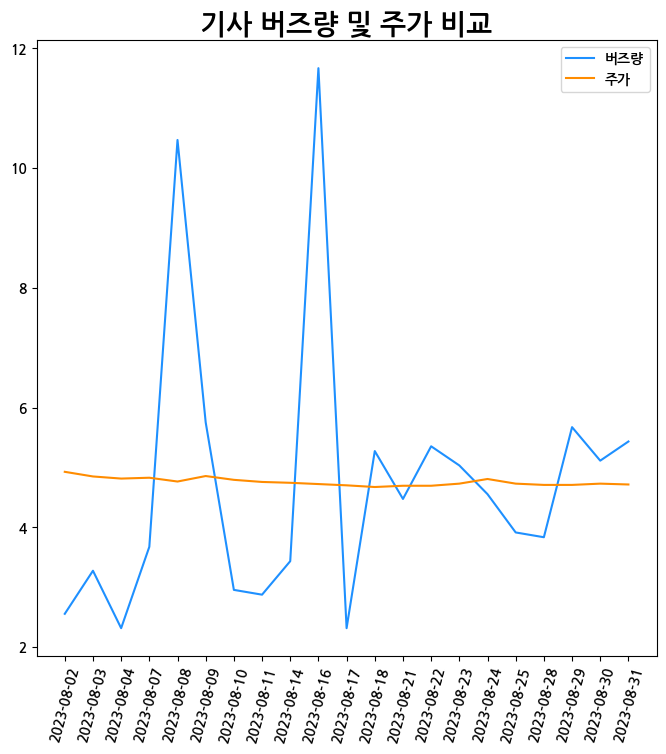

In [114]:
# 기사 버즈량 및 주가 비교 시각화
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'})
plt.figure(figsize=(8, 8))
plt.title("기사 버즈량 및 주가 비교", fontsize=20)
plt.xticks(rotation=75)

dates = list(map(lambda n: pd.to_datetime(n).strftime('%Y-%m-%d'), mergeData['날짜']))

#날짜
plt.plot(dates, mergeData['본문백분위'].values, label='버즈량', color ='dodgerblue')
plt.plot(dates, mergeData['삼성전자 주가백분위'].values, label='주가',color='darkorange')

#범례를 그래프의 오른쪽 상단
plt.legend(loc=1)
plt.show()

#### 2. 일자별 기사 관심도

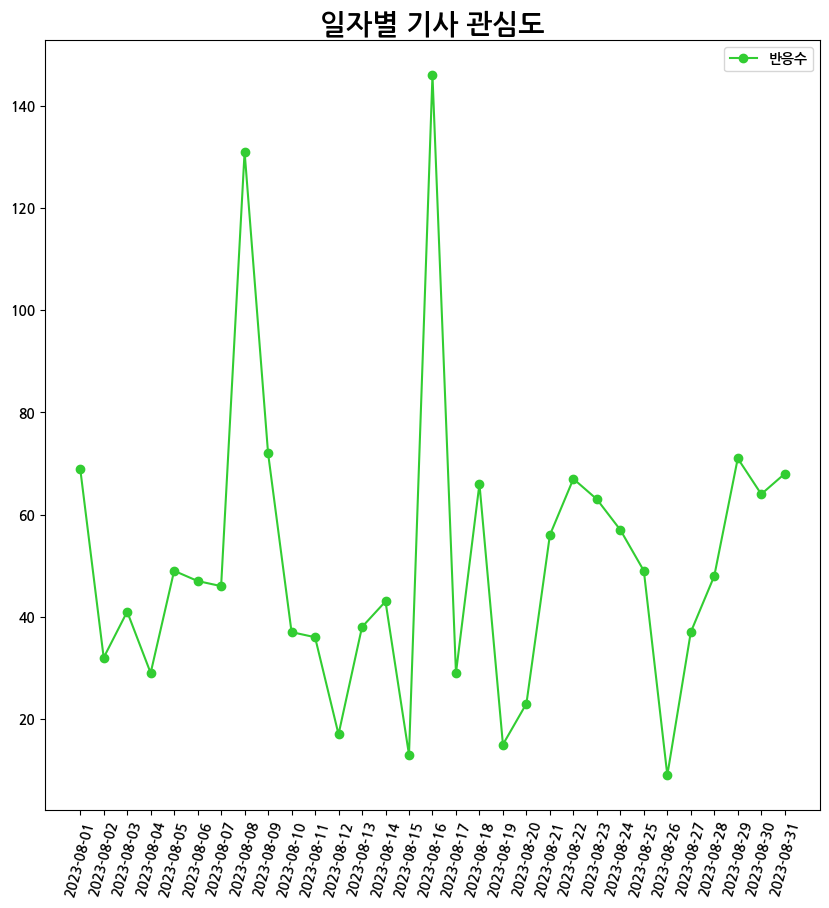

In [112]:
#일자별 기사 관심도
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothicBold'})
plt.figure(figsize=(10, 10))
plt.title("일자별 기사 관심도", fontsize=20)
plt.xticks(rotation=75)
#날짜
dates = list(map(lambda n: pd.to_datetime(n).strftime('%Y-%m-%d'), reactivity.index))

plt.plot(dates, reactivity['반응갯수'].values, label='반응수', marker = 'o', linestyle = 'solid', color='limegreen')
plt.legend(loc=0)
plt.show()

#### 3. 카테고리별 기사량

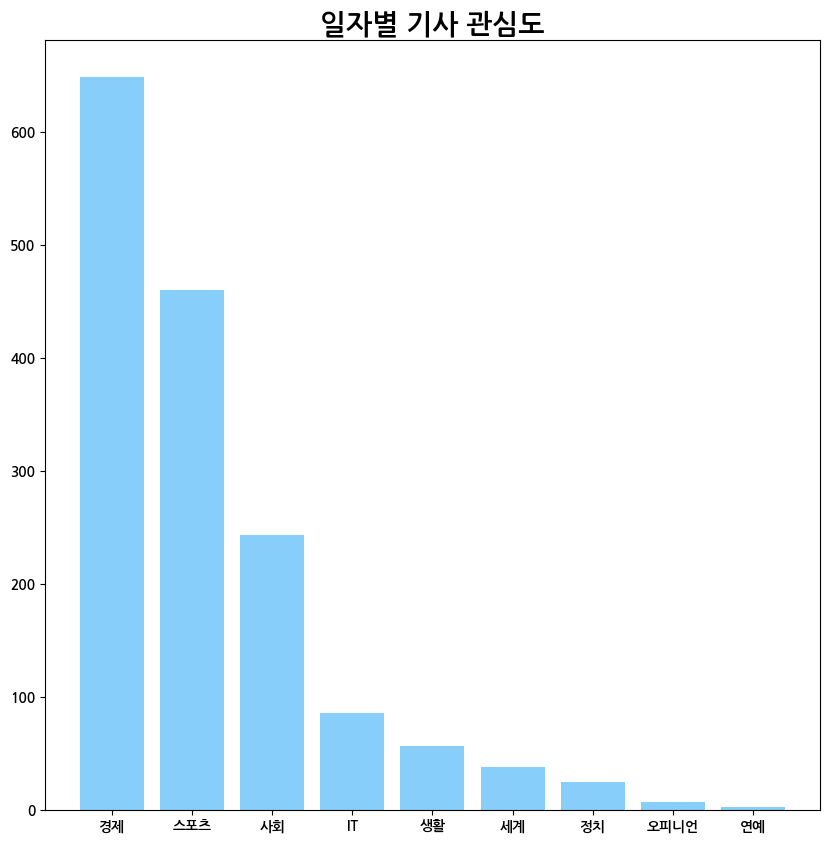

In [132]:
plt.figure(figsize=(10, 10))
plt.title("일자별 기사 관심도", fontsize=20)
plt.bar(category.index, category['분야'], color='lightskyblue')
plt.show()

#### 워드 클라우드

In [133]:
from wordcloud import WordCloud, STOPWORDS

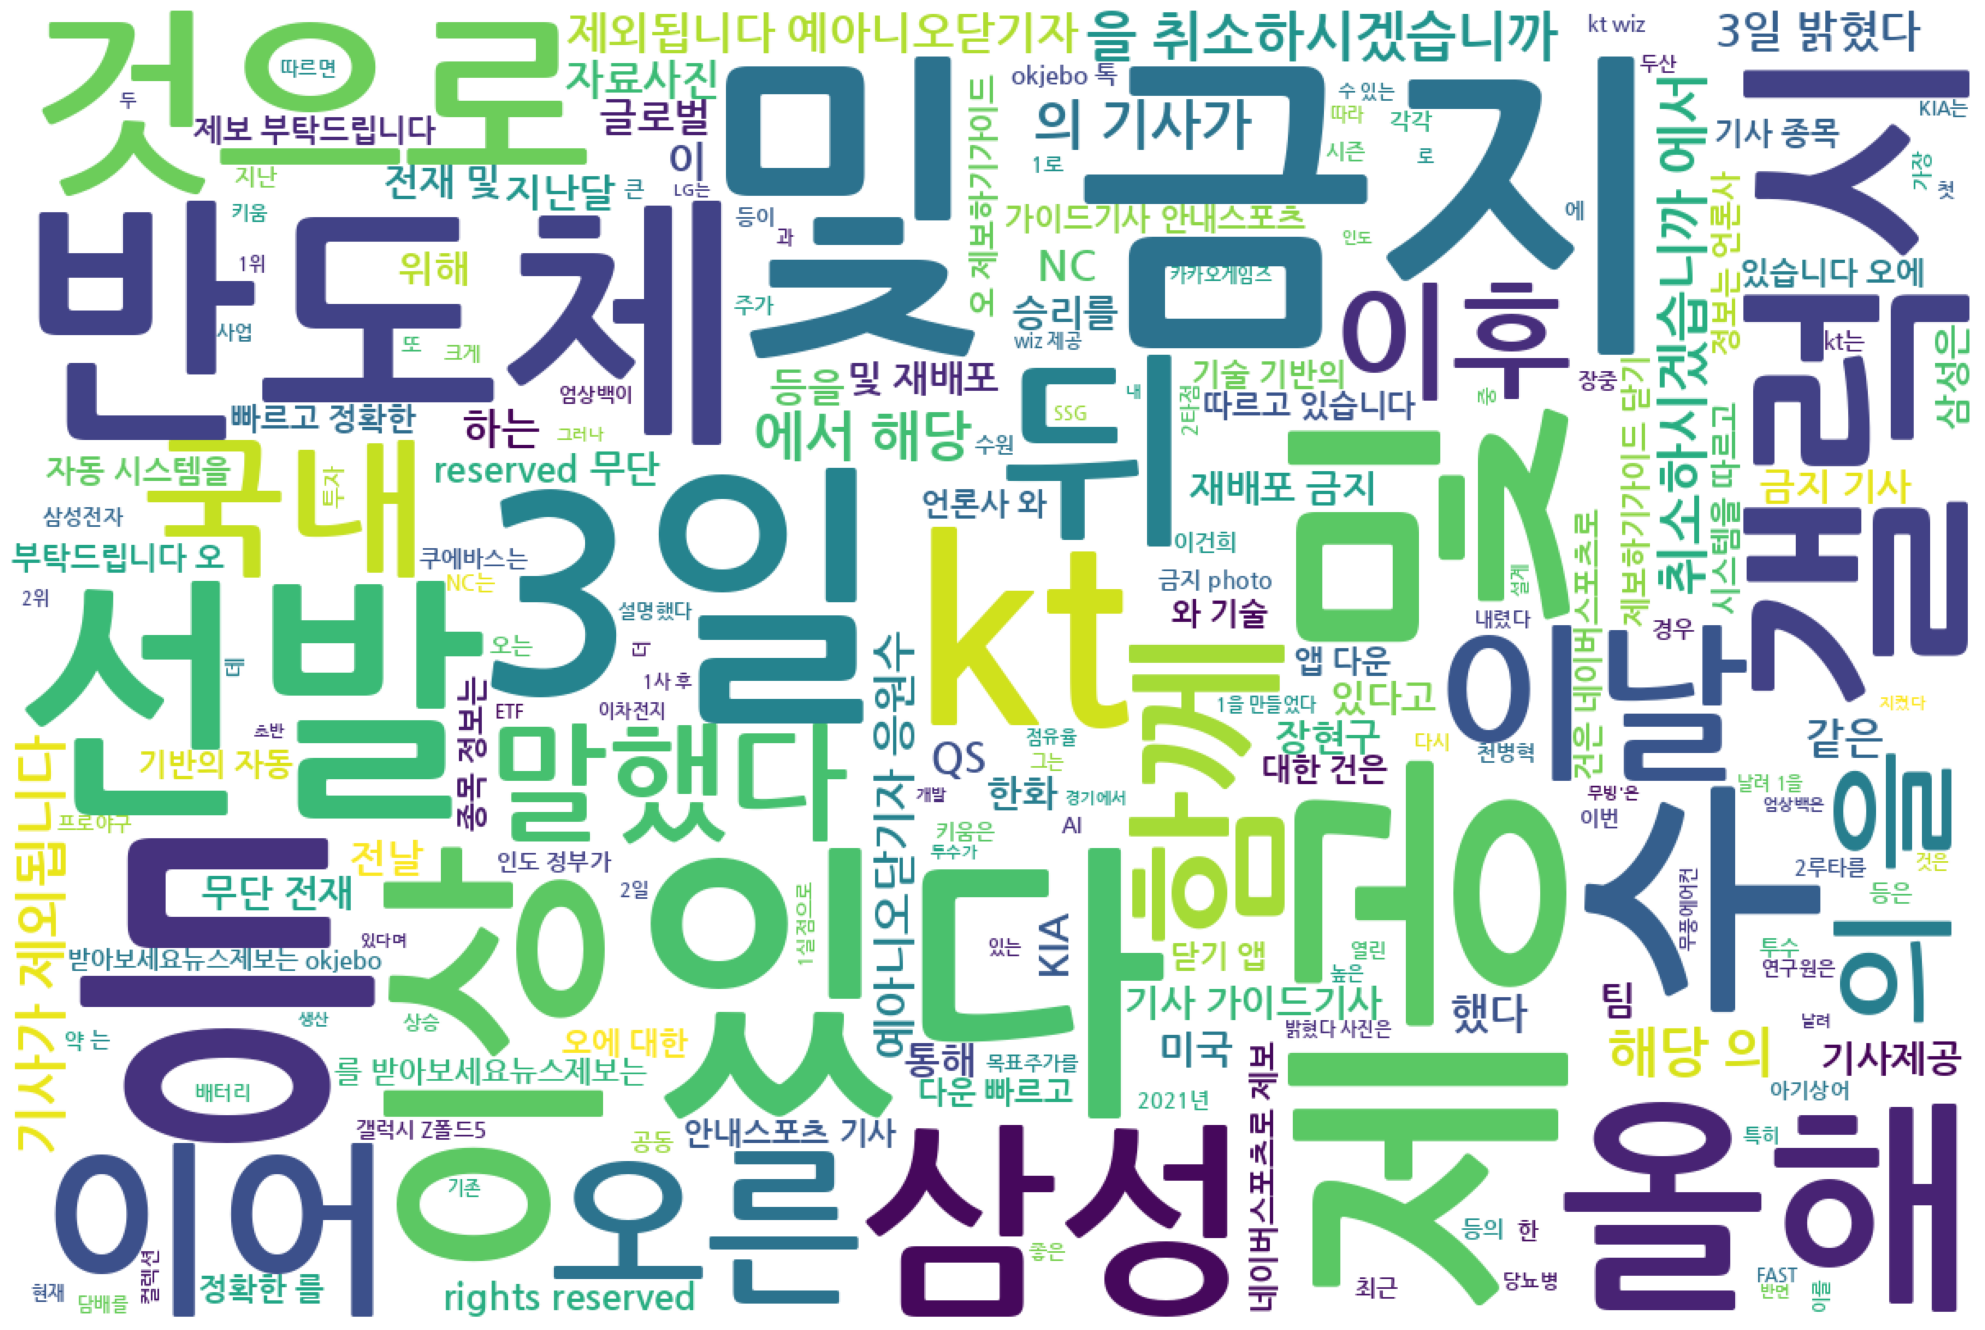

In [171]:
wordcloud = WordCloud(max_font_size=200,
                      font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
                      stopwords=STOPWORDS,
                      background_color='#FFFFFF',
                      width=1200,
                      height=800).generate(''.join(samsungNews[samsungNews['날짜']=='2023-08-03']['내용'].values))

plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()